# COGS 108 - Final Project 

# Overview

Looking at the datasets of violations for restaurants, we want to see if there is a correlation between violations and restaurant type (chain vs non-chain). We summed the total number of violations, narrowed down samples to only those that are restaurants, and divided it into chain or non-chain restaurants. Overall, restaurants tend to have about 32 non-critical violations and 5 critical violations. 

# Name & PID

- Name: Andy Dong
- PID: A15321789

# Research Question

Are chain restaraunts performing better than nonchain restaurants in regards to cleaniness(cases of food-borne illness)

## Background and Prior Work

According to Pei Liu (Source 3), independent restaurants are 1.64 times more likely to receive critical violations compared to chain restaurants. In addition, the public health report (Source 1) states that chain restaurants have fewer total total violations compared to nonchain restaurants at 6.5 to 9.6. Even among chain restaurants, in this case fast-food restaurants, the amount of training received correlates to the number of violations an employee made (Source 2). Source 1 collected restaurant type (chain vs nonchain), inspection frequency, and violation type. Source 2 collected the amount of training received from each restaurant and violation types. Similarly, Source 3 collected restaurant type and type of violation.  

References (include links):
- 1)https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5349477/ 
- 2)https://www.tandfonline.com/doi/full/10.1080/15332840802156881 
- 3)https://www.tandfonline.com/doi/abs/10.1080/15378020.2016.1206770?scroll=top&needAccess=true&journalCode=wfbr20

# Hypothesis


The cleaniness of a restaurant (food inspection violations & cases of foodborne illness) is related to the amount of training an employee receives in regards to food hygiene. The more time an employer spends on training its staff, the less violations and cases the restaurant will receive. 

# Dataset(s)

*Fill in your dataset information here*
- Dataset Name: inspections.csv
- Link to the dataset: 
- Number of observations: 18466

Contains the results of inspections of restaurants. The dataset includes number of critical and non-critical violations, date, and name of restaurant. 

- Dataset Name: restaurants.csv
- Link to the dataset:
- Number of observations: 3324

Contains the restaurants being inspected. Used to narrow down restaurants only.

- Dataset Name: violations.csv
- Link to the dataset:
- Number of observations: 189802

Contains the violations that restaurants broke. Used to find the type of violation.

- Dataset Name: FastFoodRestaurants.csv
- Link to the dataset:
- Number of observations: 10000

Contains the address and name of Fast Food Restaurants in the US. Used to determine if a restaurant is chain or not.

# Setup

In [1]:
# Imports 
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
sns.set()
sns.set_context('talk')

import warnings
warnings.filterwarnings('ignore')

import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest

# Data Cleaning

Describe your data cleaning steps here.

In [2]:
## Clean Up for Inspection
inspections = pd.read_csv('./data/inspections.csv')
inspections = inspections[['hsisid', 'date', 'name', 'address1', 'city', 'state', 'num_non_critical', 'critical']]

# Find any empty rows (none)
inspections.isnull().any(axis=1)
empty_row = inspections[inspections.isnull().any(axis=1)]

# Lower case the name and address
def lower_string(string):
    string = string.lower()
    return string

def normal_date(string):
    string = string[:10]
    return string

inspections['name'] = inspections['name'].apply(lower_string)
inspections['address1'] = inspections['address1'].apply(lower_string)
inspections['date'] = inspections['date'].apply(normal_date)
inspections['city'] = inspections['city'].apply(lower_string)

,hsisid,date,name,address1,city,state,num_non_critical,critical
0,4092013748,2012-09-21,cafe 3000 at wake med,3000 new bern ave,raleigh,NC,7,1
1,4092014046,2012-09-21,overtime sports pub,1030-149 n rogers ln,raleigh,NC,11,0
2,4092015191,2012-09-21,taste of china,6209 rock quarry rd,raleigh,NC,8,1
3,4092016122,2012-09-21,panera bread #1643,1065 darrington dr,cary,NC,3,1
4,4092021513,2012-09-21,walmart supercenter #4499-00 deli/bakery,841 e gannon ave,zebulon,NC,4,1
...,...,...,...,...,...,...,...,...
18461,4092021142,2016-11-03,sino wok,5959-1108 triangle town blv,raleigh,NC,13,1
18462,4092110100,2016-11-03,weatherstone elem. sch. cafeteria,1000 olde weatherstone way,cary,NC,3,1
18463,4092110487,2016-11-03,alston ridge elementary school cafeteria,11555 green level church rd,cary,NC,4,1
18464,4092300177,2016-11-03,food lion #996 meat market,7971 fayetteville rd,raleigh,NC,2,1


In [18]:
## Sum the violations for each unique id
unique = inspections['hsisid'].unique()
non_critical = [0] * len(unique)
critical = [0] * len(unique)
name = [0] * len(unique)
address = [0] * len(unique)

count = 0
count1 = 0
for i in unique:
    count1 = 0
    for j in sum_violations['hsisid']:
        if( i == j ):
            non_critical[count] += inspections['num_non_critical'][count1]
            critical[count] += inspections['critical'][count1]
            name[count] = inspections['name'][count1]
            address[count] = inspections['address1'][count1]
        count1 += 1
    count += 1

In [20]:
# Compiled dataset we are going to use
data = { 'hsisid': unique, 'name': name, 'address': address, 'non_critical': non_critical, 'critical': critical }
df = pd.DataFrame(data, columns = ['hsisid','name', 'address', 'non_critical', 'critical'])

,hsisid,name,address,non_critical,critical
0,4092013748,cafe 3000 at wake med,3000 new bern ave,60,9
1,4092014046,overtime sports pub,1030-149 n rogers ln,52,6
2,4092015191,taste of china,6209 rock quarry rd,44,7
3,4092016122,panera bread #1643,1065 darrington dr,57,6
4,4092021513,walmart supercenter #4499-00 deli/bakery,841 e gannon ave,31,9
...,...,...,...,...,...
3040,4092017300,wendy's #6324,4023 davis dr,1,1
3041,4092017343,sleep inn foodservice,12401 wake union church rd,3,1
3042,4092017285,szechuan garden morrisville,10285 chapel hill rd,4,1
3043,4092021984,speedy burritos,5959-1100 triangle town blvd,12,1


In [152]:
## Clean up for Restaurants 
restaurants = pd.read_csv('./data/restaurants.csv')

restaurants = restaurants[['hsisid', 'name','address1', 'city', 'state', 'facilitytype']]
restaurants['name'] = restaurants['name'].apply(lower_string)
restaurants['address1'] = restaurants['address1'].apply(lower_string)
restaurants['city'] = restaurants['city'].apply(lower_string)
restaurants['facilitytype'] = restaurants['facilitytype'].apply(lower_string)

# Get only restaurants
restaurants = restaurants[ restaurants['facilitytype'] == 'restaurant']
restaurants = restaurants.reset_index()
# Find any empty rows (none)
print( sum(restaurants.isnull().any(axis=1)) )

0


In [153]:
# Removing non-restaurants from our dataset based on data from restaurants.csv
temp = []
for i in restaurants['name']:
    temp.append( df[i == df['name']] )

In [154]:
# For each restaurant, match id in dataset. 
# If there is not id match in dataset, remove from dataset
hsisid = [0] * len(temp)
non_critical = [0] * len(temp)
critical = [0] * len(temp)
name = [0] * len(temp)
address = [0] * len(temp)

for i in range(0, len(restaurants['hsisid'])):
    for j in range(0, len(df['hsisid'])):
        if ( restaurants['hsisid'][i] == df['hsisid'][j] ):
            hsisid[i] = df['hsisid'][j]
            non_critical[i] = df['non_critical'][j]
            critical[i] = df['critical'][j]
            name[i] = df['name'][j]
            address[i] = df['address'][j]

            

In [159]:
data1 = { 'hsisid': hsisid, 'name': name, 'address': address, 'non_critical': non_critical, 'critical': critical }
df = pd.DataFrame(data1, columns = ['hsisid','name', 'address', 'non_critical', 'critical'])
len(df)

2229

In [145]:
## Clean up for Violations
violations = pd.read_csv('./data/violations.csv')
violations = violations[['hsisid', 'category', 'critical', 'severity', 'shortdesc', 'violationtype']]
len(violations['hsisid'].unique())

4270

In [185]:
## Clean up for Fast Food Restaurants
ff = pd.read_csv('./data/FastFoodRestaurants.csv')
ff = ff[['address', 'name']]
ff['address'] = ff['address'].apply(lower_string)
ff['name'] = ff['name'].apply(lower_string)
ff.head(20)

,address,name
0,324 main st,mcdonald's
1,530 clinton ave,wendy's
2,408 market square dr,frisch's big boy
3,6098 state highway 37,mcdonald's
4,139 columbus rd,omg! rotisserie
5,4182 tonya trl,domino's pizza
6,590 s main st,domino's pizza
7,401 n jennings st,mcdonald's
8,205 w church st,wendy's
9,2711 w. kings highway ste. 18,pizza hut


In [186]:
# If address is in FFR, then it is a chain
chain = [0] * len(df)
for i in range(0, len(df['name'])):
    for j in range(0, len(ff['name'])):
        if( df['address'][i] == ff['address'][j] ):
            chain[i] = 1

In [199]:
df['chain'] = chain

From the 4 datasets, we gathered the id, name, address, non_critical violation, critical violation, violation type, and restaurant type. Next, we can analyze this data to see what it tells us about the difference in chain vs non-chain restaurants.

# Data Analysis & Results

Include cells that describe the steps in your data analysis.

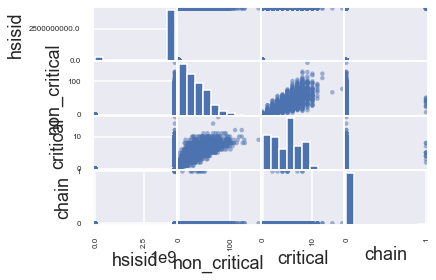

In [200]:
## YOUR CODE HERE
fig = pd.plotting.scatter_matrix(df)

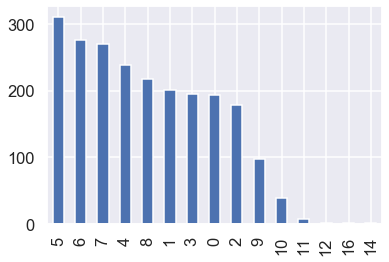

In [203]:
counts = df['critical'].value_counts()
counts.plot(kind='bar')

In [216]:
non_critical_avg = df['non_critical'].values
critical_avg = df['critical'].values

(st_non, p_non) = normaltest(non_critical_avg)
(st_crit, p_crit) = normaltest(critical_avg)

is_n_non = bool(p_non < 0.01)
is_n_crit = bool(p_crit < 0.01)

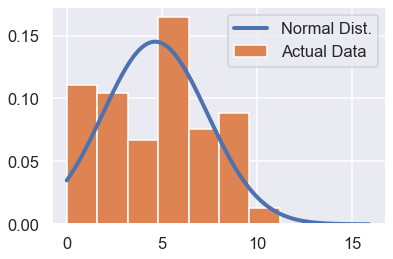

In [215]:
xs = np.arange(critical_avg.min(), critical_avg.max(), 0.1)
fit = stats.norm.pdf(xs, np.mean(critical_avg), np.std(critical_avg))
# most easily done using matplotlib
plt.plot(xs, fit, label = 'Normal Dist.', lw = 4)
plt.hist(critical_avg, density = True, label = 'Actual Data');
plt.legend();

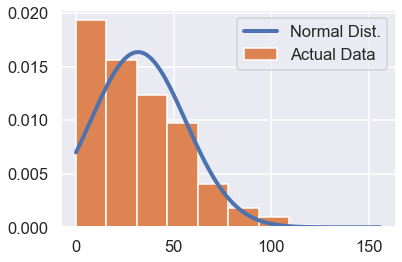

In [217]:
xs = np.arange(non_critical_avg.min(), non_critical_avg.max(), 0.1)
fit = stats.norm.pdf(xs, np.mean(non_critical_avg), np.std(non_critical_avg))
# most easily done using matplotlib
plt.plot(xs, fit, label = 'Normal Dist.', lw = 4)
plt.hist(non_critical_avg, density = True, label = 'Actual Data');
plt.legend();

In [213]:
## Total averages for all types of restaurants
sum(non_critical_avg)/len(non_critical_avg), sum(critical_avg)/len(critical_avg)

(31.79452669358457, 4.641094661283087)

In [230]:
chain_non_crit = [0]
non_chain_non_crit = [0]

chain_crit = [0]
non_chain_crit = [0]

for i in df['non_critical']:
    if df['chain'][i] == 1:
        chain_non_crit.append(df['non_critical'][i])
    else:
        non_chain_non_crit.append(df['non_critical'][i])
        
for i in df['critical']:
    if df['chain'][i] == 1:
        chain_crit.append(df['critical'][i])
    else:
        non_chain_crit.append(df['critical'][i])

ValueError: No axis named 1 for object type <class 'pandas.core.series.Series'>

# Ethics & Privacy

We need to anonymize the name of restaurants that we used to not single out a specific restaurant. 

# Conclusion & Discussion

Overall, restaurants tend to have about 32 non-critical violations and 5 critical violations. 